In [14]:
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
import mne
from pprint import pprint
import json
import csv
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)
from scipy import stats

In [21]:
# Get the combined epochs to get the data in specific time window for statistics analysis
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"


#print(root_data_path)


"""
n_epoch_LDT = mne.read_epochs(meg_data_path / Path('009-016_LDT-merge-epo.fif'))
n_epoch_LDT.pick('mag')
#n_epoch_LDT = n_epoch_LDT.load_data().get_data()
#print(n_epoch_LDT)
print(len(n_epoch_LDT))

n_epoch_LDT.plot()
"""


tmp_sub_evoked_meanH_LIST = []
all_sub_evoked_meanH_LIST = []

tmp_sub_evoked_meanL_LIST = []
all_sub_evoked_meanL_LIST = []

selected_subLIST = [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22]

for idINT in selected_subLIST:
    sub_id = idINT
    
    # Load in the epochs of each subs
    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))   
    n_epoch_LDT.pick('mag').crop(0.4, 0.6).pick_channels(["MEG 011"])
    
    # Get the evoked responses from the epochs
    evoked_H = n_epoch_LDT["High_CD"].average()
    evoked_L = n_epoch_LDT["Low_CD"].average()
    
    #print(evoked_H)
    
    # Get the data of certain time range of the evoked, we should pick the certain channel to conduct statistics
    #tmp_evoked_H = evoked_H().copy()
    #tmp_evoked_L = evoked_L().copy()
    tmp_data_H_FLOAT = evoked_H.copy().get_data().mean()
    tmp_data_L_FLOAT = evoked_L.copy().get_data().mean()
    
    print("                         S%.3d_H" %sub_id, tmp_data_H_FLOAT)
    print("                         S%.3d_L" %sub_id, tmp_data_L_FLOAT)
    
    tmp_sub_evoked_meanH_LIST.extend([tmp_data_H_FLOAT])
    tmp_sub_evoked_meanL_LIST.extend([tmp_data_L_FLOAT])
    
    print("                                                   HEREEEEEE!!", len(tmp_sub_evoked_meanH_LIST))
    print("                                                   HEREEEEEE!!", len(tmp_sub_evoked_meanL_LIST))
    
    #all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)


Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S007_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
                         S007_H 2.237247397849995e-14
                         S007_L 1.579149851306598e-14
                                                   HEREEEEEE!! 1
                                                   HEREEEEEE!! 1
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 proje

In [9]:
print(tmp_sub_evoked_meanH_LIST)
print(tmp_sub_evoked_meanL_LIST)

[4.252350292428971e-14, -1.1430243092239316e-14, -3.970947475501293e-14, -1.606478688374492e-14, -8.580710359057236e-14, 5.934409646521337e-14, -2.3789111670017247e-14, -3.7165492981786595e-14, -3.921874357094205e-14, 2.540412804140143e-14, 2.9622604459720496e-14, -1.1773265841642447e-14, -1.1197553504256987e-13]
[4.31947047240494e-14, -4.3077713307661016e-14, -3.520798767690295e-14, 1.1509452392758417e-14, 1.778850568330579e-14, 1.3788260803333592e-13, -4.059474269942488e-15, 1.8837016169640148e-14, -3.8639925606841375e-15, 4.0493151187592436e-14, 5.3125843319048174e-14, -1.9899240298485015e-15, -1.0301238874675973e-13]


In [22]:
evoked_meanH_Array = np.array(tmp_sub_evoked_meanH_LIST)
print(len(evoked_meanH_Array))
evoked_meanL_Array = np.array(tmp_sub_evoked_meanL_LIST)
print(len(evoked_meanL_Array))

# Conducting pair t-test bwtween HCD & LCD evoked  #default= 雙尾檢定 >>這裡選"less" for單尾檢定 >> 因為是H-L，所以H放前面
pair_ttest_CD = stats.ttest_rel(evoked_meanH_Array, evoked_meanL_Array)#, alternative='less')  
print(pair_ttest_CD)
print(type(pair_ttest_CD))


"""
## MEG 043's results ##  
8
8
Ttest_relResult(statistic=-2.423404628538318, pvalue=0.04586237184672601)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-1.5720849415578557, pvalue=0.14191228338254994)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 044's results ##
8
8
Ttest_relResult(statistic=-2.1871792306350764, pvalue=0.06494866951520999)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-1.990178366726456, pvalue=0.069847496582107)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 045's results ##
8
8
Ttest_relResult(statistic=-2.524864918639623, pvalue=0.03952845528251146)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-1.9623494775769215, pvalue=0.07333109908565684)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 046's results ##
8
8
Ttest_relResult(statistic=-2.4394154731408473, pvalue=0.04479735449349964)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-2.767701425124873, pvalue=0.017034313238274524)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 047's results ##
8
8
Ttest_relResult(statistic=-2.1658217278041443, pvalue=0.06702927401379763)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-0.7391483850181899, pvalue=0.4740278163760715)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 048's results ##
8
8
Ttest_relResult(statistic=-3.766965026967068, pvalue=0.007010700615039939)
<class 'scipy.stats.stats.Ttest_relResult'>

13
13
Ttest_relResult(statistic=-3.587025117630649, pvalue=0.0037337884653158683)
<class 'scipy.stats._stats_py.Ttest_relResult'>

## MEG 008's results ##
13
13
Ttest_relResult(statistic=-3.097627204766184, pvalue=0.00923059826554211)
<class 'scipy.stats._stats_py.Ttest_relResult'>
"""

13
13
Ttest_relResult(statistic=-2.1342502544502175, pvalue=0.054143252838433846)
<class 'scipy.stats._stats_py.Ttest_relResult'>


"\n## MEG 043's results ##  \n8\n8\nTtest_relResult(statistic=-2.423404628538318, pvalue=0.04586237184672601)\n<class 'scipy.stats.stats.Ttest_relResult'>\n\n13\n13\nTtest_relResult(statistic=-1.5720849415578557, pvalue=0.14191228338254994)\n<class 'scipy.stats._stats_py.Ttest_relResult'>\n\n## MEG 044's results ##\n8\n8\nTtest_relResult(statistic=-2.1871792306350764, pvalue=0.06494866951520999)\n<class 'scipy.stats.stats.Ttest_relResult'>\n\n13\n13\nTtest_relResult(statistic=-1.990178366726456, pvalue=0.069847496582107)\n<class 'scipy.stats._stats_py.Ttest_relResult'>\n\n## MEG 045's results ##\n8\n8\nTtest_relResult(statistic=-2.524864918639623, pvalue=0.03952845528251146)\n<class 'scipy.stats.stats.Ttest_relResult'>\n\n13\n13\nTtest_relResult(statistic=-1.9623494775769215, pvalue=0.07333109908565684)\n<class 'scipy.stats._stats_py.Ttest_relResult'>\n\n## MEG 046's results ##\n8\n8\nTtest_relResult(statistic=-2.4394154731408473, pvalue=0.04479735449349964)\n<class 'scipy.stats.stats.

Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S007_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
Reading /Volumes/Neurolang_1/Project_A

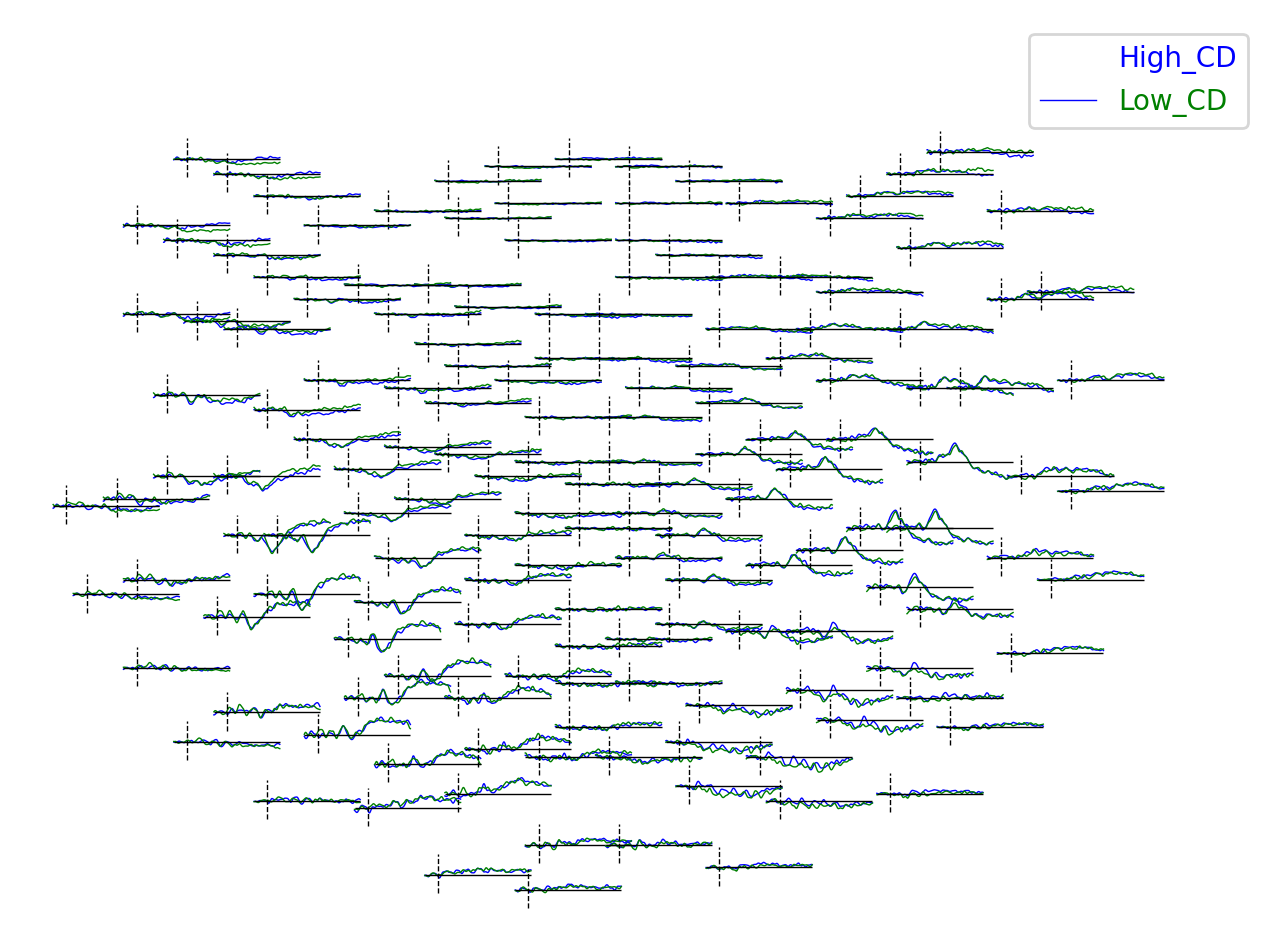

In [6]:
tmp_sub_epochsLIST = []
all_sub_epochsLIST = []
selected_subLIST = [7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22]

for idINT in selected_subLIST:
    sub_id = idINT
    #print(sub_id)
    
    n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))
    #n_epoch_LDT = n_epoch_LDTfile.load_data().get_data()

    #print(n_epoch_LDTfile.info)
    n_epoch_LDT.pick('mag')
    tmp_sub_epochsLIST.extend([n_epoch_LDT])
    all_sub_epochsLIST = mne.concatenate_epochs(tmp_sub_epochsLIST)
all_sub_epochsLIST

# To see the average evoked of every participants so far

#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [24]:
for i in range(1, 158):
    mne.viz.plot_compare_evokeds(tmp, picks='MEG %.3d'%i)

/Applications/anaconda3/envs/eelbrain_0_36/lib/python3.10/site-packages/mne/viz/evoked.py:2372: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  axes = (plt.subplots(figsize=(8, 6))[1] for _ in ch_types)


In [11]:
# Check the resluts of some channel
# MEG 043最大/ MEG 048_跟046一樣小/ MEG 045 ＝ MEG 044＿比046大一點/ MEG 046_小/ MEG 047_比046小

MEG_046_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 046')
MEG_048_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 048')
MEG_008_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 008')

mne.viz.plot_evoked_topo(tmp, picks='MEG 046')
#MEG_048_topofig.savefig(meg_data_path / Path('MEG_048_evoked.png'), overwrite=True)
#MEG_008_topofig.savefig(meg_data_path / Path('MEG_008_evoked.png'), overwrite=True)
#mne.viz.plot_compare_evokeds(tmp, picks='MEG 048')

AttributeError: 'list' object has no attribute 'plot'

In [ ]:
MEG_046_topofig.savefig(meg_data_path / Path('MEG_046_evoked.png'), overwrite=True)
MEG_048_topofig.savefig(meg_data_path / Path('MEG_048_evoked.png'), overwrite=True)
MEG_008_topofig.savefig(meg_data_path / Path('MEG_008_evoked.png'), overwrite=True)

In [ ]:
MEG_043_topofig = mne.viz.plot_compare_evokeds(tmp, picks='MEG 043')
plt.savefig(meg_data_path / Path('MEG_043_evoked.png'), overwrite=True)

In [33]:
## FOR DEBUGGING evoked.get_data()
root_data_path = Path("/Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG")
meg_data_path = root_data_path / "LTTC_MEG_ALL_results"

sub_id = 9
n_epoch_LDT = mne.read_epochs(meg_data_path / Path('S%.3d_ICAed_LDT-epo.fif' %sub_id))   
n_epoch_LDT.pick('mag').crop(0.4, 0.6).pick_channels(["MEG 043"])  #.get_data()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

tmp_H = evoked_H.copy().get_data().mean()   #.crop(0.4, 0.6)
print(tmp_H)

Reading /Volumes/Neurolang_1/Project_Assistant/2021_Ongoing/2020_LTTC/Experiment_materials/LTTC_MEG/LTTC_MEG_ALL_results/S009_ICAed_LDT-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -100.00 ...     700.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
-2.1020308593595203e-14


In [ ]:
#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = n_epoch_LDT["High_CD"].average()
evoked_L = n_epoch_LDT["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [ ]:
all_sub_epochsLIST.save(meg_data_path / Path('009-016_LDT-merge-epo.fif'), overwrite=True)

In [ ]:
# To see the average evoked of every participants so far

#evoked_C = all_sub_epochsLIST["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

#evoked_C.comment = 'Control'
evoked_H.comment = 'High_CD'
evoked_L.comment = 'Low_CD'

tmp = [evoked_H, evoked_L] # [evoked_H, evoked_L]evoked_C, 
colors = 'blue', 'green'  #C:'red'H:'blue'; L:'green';   # 'blue', 'green'
mne.viz.plot_evoked_topo(tmp, color = colors)

In [ ]:
# Plot the joint
#mne.viz.plot_compare_evokeds(tmp, picks='mag')
H_minus_L = mne.combine_evoked([evoked_H, evoked_L], weights=[1, -1])
H_minus_L.plot_joint()
plt.savefig(meg_data_path / Path('H-minus-L_evoked.png'), overwrite=True)

# Plot the specific times
times = np.linspace(0.05, 0.650, 13)
H_minus_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('H-minus-L_evoked_topomap.png'), overwrite=True)

In [ ]:
#evoked_C = n_epoch_LDT["Control"].average()
evoked_H = all_sub_epochsLIST["High_CD"].average()
evoked_L = all_sub_epochsLIST["Low_CD"].average()

times = np.linspace(0.05, 0.45, 9)
#evoked_C.plot_topomap(ch_type='mag', times=times, colorbar=True)
evoked_H.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('HCD-evoked_topomap.png'), overwrite=True)
evoked_L.plot_topomap(ch_type='mag', times=times, colorbar=True)
plt.savefig(meg_data_path / Path('LCD-evoked_topomap.png'), overwrite=True)

In [ ]:
evoked_H.plot_joint()
plt.savefig(meg_data_path / Path('HCD-evoked_joint.png'), overwrite=True)
evoked_L.plot_joint()
plt.savefig(meg_data_path / Path('LCD-evoked_joint.png'), overwrite=True)